In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/acled-data/acled_data.csv


In [34]:
import requests
import csv

# Replace with your ACLED email and access key
email = 'brandon_concepcion@berkeley.edu'
access_key = 'Xo*LsNEYD*gXG7WrW3fl'

# Define the API endpoint and parameters
url = 'https://api.acleddata.com/acled/read'
params = {
    'email': email,
    'key': access_key,
    'limit': 50000,  # Number of records to fetch
    'format': 'json',  # Response format
    'country': 'Iran'
}

# Make the API request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json().get("data", [])
    
    # Define the CSV file name
    csv_file = "acled_data.csv"

    # Open a CSV file to write data
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        
        # Write the header row
        if data:
            writer.writerow(data[0].keys())  # Use the keys from the first record as headers
        
        # Write the data rows
        for record in data:
            writer.writerow(record.values())
    
    print(f"Data successfully saved to {csv_file}")
else:
    print(f"Error: {response.status_code} - {response.text}")

Data successfully saved to acled_data.csv


In [35]:
data = pd.read_csv('acled_data.csv')
data

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,IRN29327,2024-11-08,2024,1,Political violence,Battles,Armed clash,Army of Justice,NaN,Rebel group,...,Rasak,26.2368,61.3990,2,Baloch Campaign; BBC News; Haalvash; Iran Inte...,Other-National,"On 8 November 2024, militiamen of the Army of ...",5,NaN,1731368108
1,IRN29484,2024-11-08,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),NaN,Protesters,...,Mashhad,36.3156,59.5680,1,Iran International,International,"On 8 November 2024, supporters of 'Enjoining g...",0,crowd size=no report,1731368109
2,IRN29337,2024-11-07,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Health Workers (Iran),Protesters,...,Bafq,31.6035,55.4025,1,Human Rights Activists in Iran (HRA),Local partner-Other,"On 7 November 2024, health workers and nurses ...",0,crowd size=no report,1731368109
3,IRN29338,2024-11-07,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Health Workers (Iran),Protesters,...,Meybod,32.2501,54.0166,1,Human Rights Activists in Iran (HRA),Local partner-Other,"On 7 November 2024, health workers and nurses ...",0,crowd size=no report,1731368109
4,IRN29339,2024-11-07,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Health Workers (Iran),Protesters,...,Ardakan,32.3100,54.0175,1,Human Rights Activists in Iran (HRA),Local partner-Other,"On 7 November 2024, health workers and nurses ...",0,crowd size=no report,1731368109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28944,IRN15063,2016-01-02,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,Varzaneh,32.4196,52.6483,1,Free Union of Iranian Workers,Other,"On 2 January 2016, some workers of Kayson Comp...",0,crowd size=no report,1646060629
28945,IRN15058,2016-01-02,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,Damghan,36.1679,54.3429,1,Free Union of Iranian Workers,Other,"On 2 January 2016, about 500 workers of the Ea...",0,crowd size=about 500,1646060630
28946,IRN15057,2016-01-02,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,Shahrud,36.4182,54.9763,1,Free Union of Iranian Workers,Other,"On 2 January 2016, about 500 workers of the Ea...",0,crowd size=about 500,1646060632
28947,IRN15062,2016-01-01,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,Varzaneh,32.4196,52.6483,1,Free Union of Iranian Workers,Other,"On 1 January 2016, some workers of Kayson Comp...",0,crowd size=no report,1646060629


In [36]:
data.value_counts('inter1')

inter1
Protesters               25378
State forces              1398
Rioters                   1256
Political militia          418
External/Other forces      338
Rebel group                117
Identity militia            40
Civilians                    4
Name: count, dtype: int64

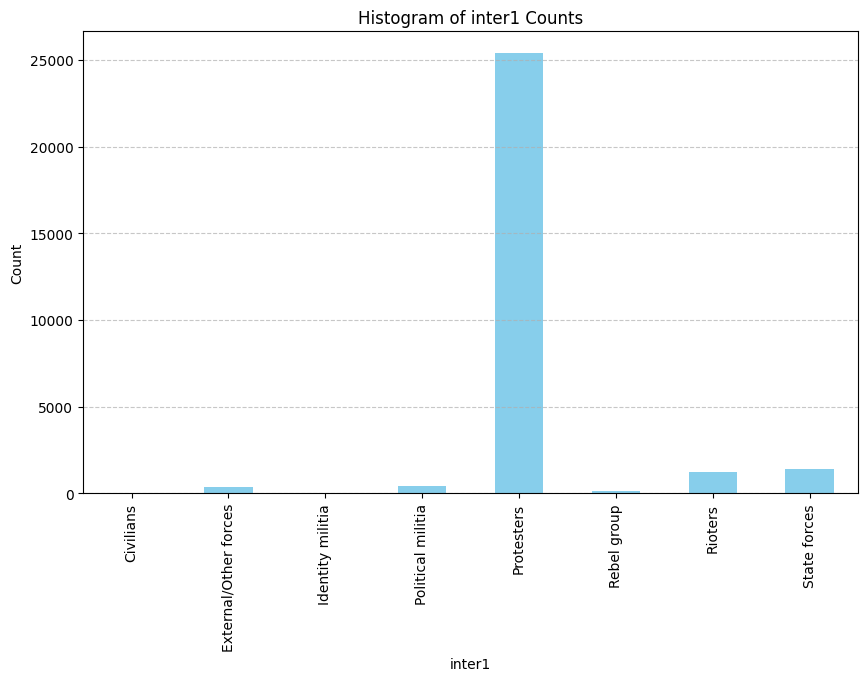

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))
data['inter1'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Histogram of inter1 Counts')
plt.xlabel('inter1')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

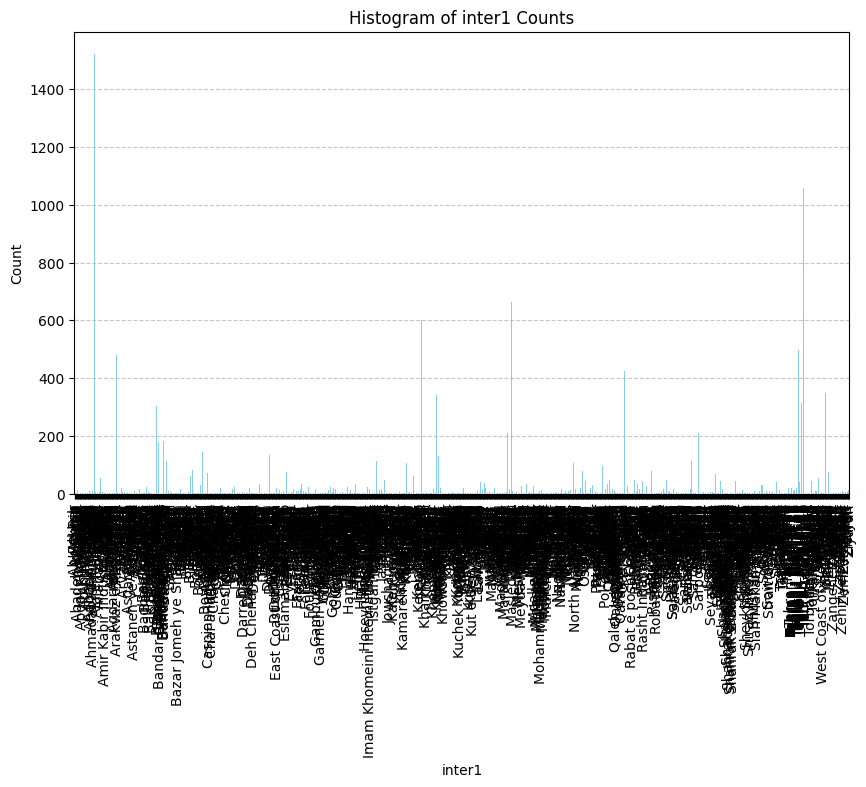

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))
data['location'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Histogram of inter1 Counts')
plt.xlabel('inter1')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [39]:
data.value_counts('country')

country
Iran    28949
Name: count, dtype: int64

In [40]:

data.value_counts('sub_event_type')

sub_event_type
Peaceful protest                      24543
Violent demonstration                  1079
Protest with intervention               746
Other                                   682
Attack                                  669
Armed clash                             416
Change to group/activity                191
Mob violence                            180
Arrests                                 123
Excessive force against protesters       97
Looting/property destruction             60
Remote explosive/landmine/IED            42
Shelling/artillery/missile attack        38
Air/drone strike                         29
Disrupted weapons use                    23
Agreement                                17
Grenade                                   4
Suicide bomb                              3
Sexual violence                           3
Abduction/forced disappearance            2
Headquarters or base established          2
Name: count, dtype: int64

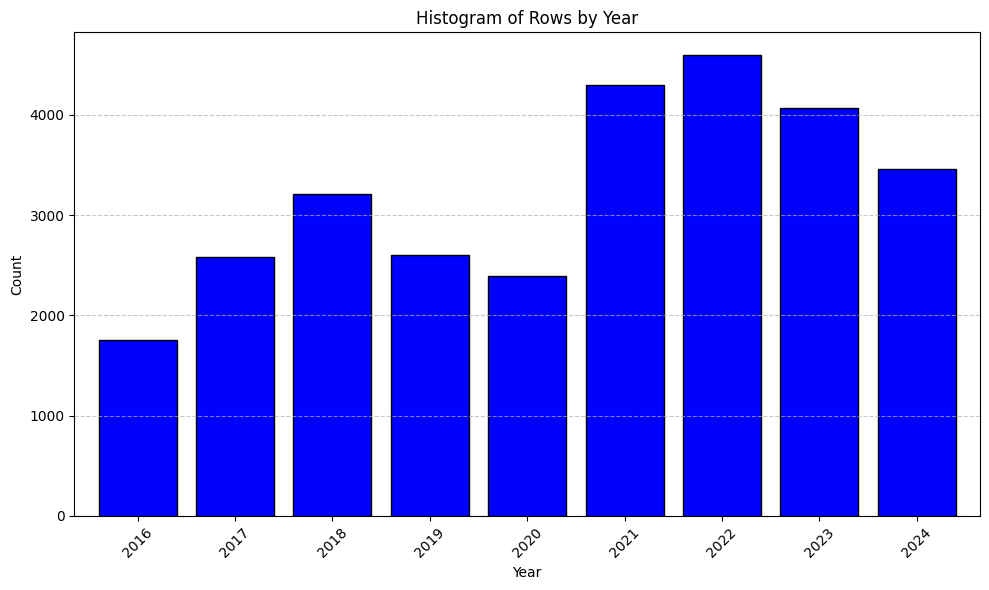

In [41]:
import matplotlib.pyplot as plt

# Create a histogram counting rows by the 'year' column
plt.figure(figsize=(10, 6))
data['year'].value_counts().sort_index().plot(kind='bar', width=0.8, color='blue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram of Rows by Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

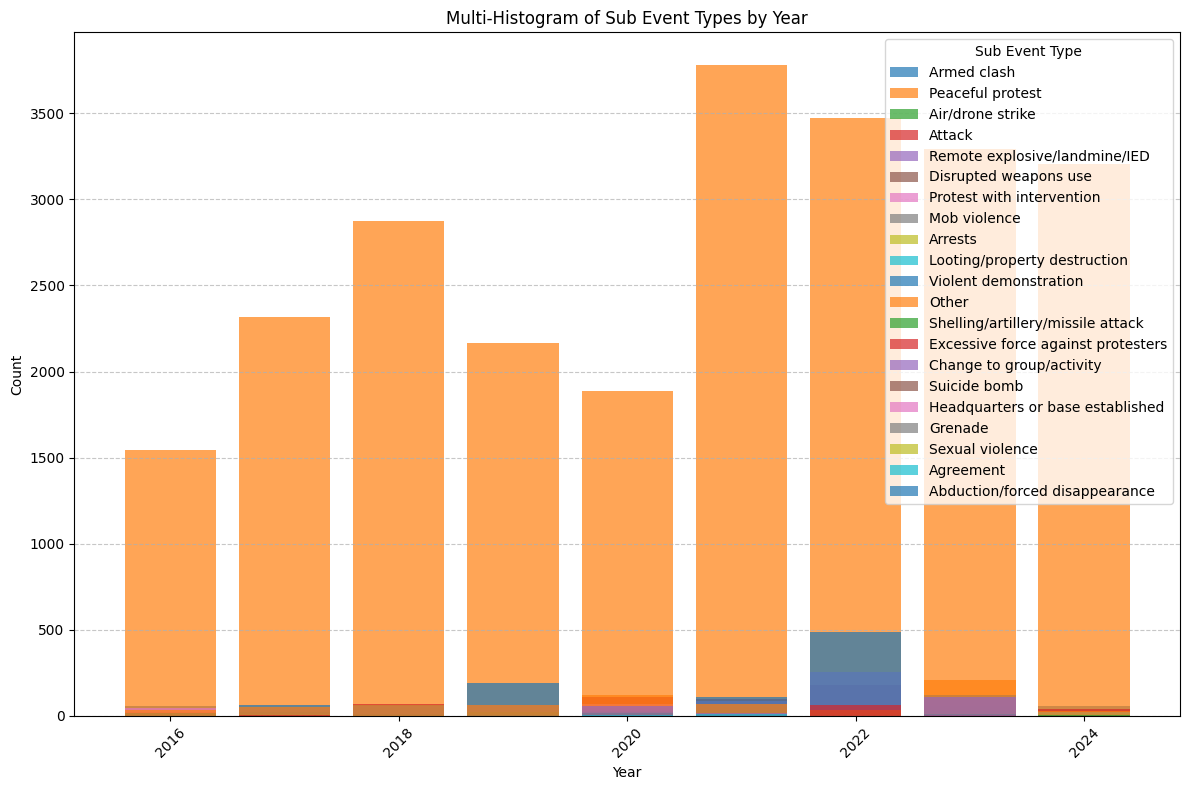

In [42]:
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame with 'year' and 'sub_event_type' columns
plt.figure(figsize=(12, 8))

# Group data by 'sub_event_type' and 'year', then create histograms for each type
sub_event_types = data['sub_event_type'].unique()

for sub_event in sub_event_types:
    subset = data[data['sub_event_type'] == sub_event]
    year_counts = subset['year'].value_counts().sort_index()
    plt.bar(year_counts.index, year_counts.values, label=sub_event, alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Multi-Histogram of Sub Event Types by Year')
plt.legend(title='Sub Event Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [43]:
data.value_counts('fatalities')


fatalities
0      27693
1        798
2        206
3         87
4         57
5         27
6         19
10        11
7          7
20         5
9          5
11         5
18         5
15         4
8          4
12         3
28         2
13         1
17         1
19         1
21         1
22         1
23         1
25         1
30         1
93         1
103        1
176        1
Name: count, dtype: int64

In [44]:
import re

# Function to count injuries/wounded people in text
def count_injuries(text):
    if not isinstance(text, str):  # Ensure the input is a string
        return 0
    # Updated regex to handle look-behind limitation
    pattern = r'(\b\d+\b)\s*(injuries|injured|wounded|casualties)|(?:injuries|injured|wounded|casualties)\s*(\b\d+\b)'
    matches = re.findall(pattern, text, flags=re.IGNORECASE)
    
    # Extract numbers from the matches
    numbers = [int(num) for match in matches for num in match if num.isdigit()]
    
    return sum(numbers)

# Apply the function to the 'notes' column of the DataFrame
data['injury_count'] = data['notes'].apply(count_injuries)

# Display the resulting DataFrame
print(data[['notes', 'injury_count']].head())

                                               notes  injury_count
0  On 8 November 2024, militiamen of the Army of ...             0
1  On 8 November 2024, supporters of 'Enjoining g...             0
2  On 7 November 2024, health workers and nurses ...             0
3  On 7 November 2024, health workers and nurses ...             0
4  On 7 November 2024, health workers and nurses ...             0


In [45]:
data

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,injury_count
0,IRN29327,2024-11-08,2024,1,Political violence,Battles,Armed clash,Army of Justice,NaN,Rebel group,...,26.2368,61.3990,2,Baloch Campaign; BBC News; Haalvash; Iran Inte...,Other-National,"On 8 November 2024, militiamen of the Army of ...",5,NaN,1731368108,0
1,IRN29484,2024-11-08,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),NaN,Protesters,...,36.3156,59.5680,1,Iran International,International,"On 8 November 2024, supporters of 'Enjoining g...",0,crowd size=no report,1731368109,0
2,IRN29337,2024-11-07,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Health Workers (Iran),Protesters,...,31.6035,55.4025,1,Human Rights Activists in Iran (HRA),Local partner-Other,"On 7 November 2024, health workers and nurses ...",0,crowd size=no report,1731368109,0
3,IRN29338,2024-11-07,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Health Workers (Iran),Protesters,...,32.2501,54.0166,1,Human Rights Activists in Iran (HRA),Local partner-Other,"On 7 November 2024, health workers and nurses ...",0,crowd size=no report,1731368109,0
4,IRN29339,2024-11-07,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Health Workers (Iran),Protesters,...,32.3100,54.0175,1,Human Rights Activists in Iran (HRA),Local partner-Other,"On 7 November 2024, health workers and nurses ...",0,crowd size=no report,1731368109,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28944,IRN15063,2016-01-02,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,32.4196,52.6483,1,Free Union of Iranian Workers,Other,"On 2 January 2016, some workers of Kayson Comp...",0,crowd size=no report,1646060629,0
28945,IRN15058,2016-01-02,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,36.1679,54.3429,1,Free Union of Iranian Workers,Other,"On 2 January 2016, about 500 workers of the Ea...",0,crowd size=about 500,1646060630,0
28946,IRN15057,2016-01-02,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,36.4182,54.9763,1,Free Union of Iranian Workers,Other,"On 2 January 2016, about 500 workers of the Ea...",0,crowd size=about 500,1646060632,0
28947,IRN15062,2016-01-01,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,32.4196,52.6483,1,Free Union of Iranian Workers,Other,"On 1 January 2016, some workers of Kayson Comp...",0,crowd size=no report,1646060629,0


In [46]:
data.value_counts('injury_count')

injury_count
0      28913
2          9
1          6
3          5
4          3
5          3
10         2
12         2
6          1
11         1
23         1
108        1
200        1
300        1
Name: count, dtype: int64

In [47]:
def count_all_numbers(text):
    if not isinstance(text, str):  # Ensure the input is a string
        return 0

    # Define patterns for digits and spelled-out numbers
    digit_pattern = r'\b\d+\b'
    word_pattern = r'\b(?:zero|one|two|three|four|five|six|seven|eight|nine|ten|' \
                   r'eleven|twelve|thirteen|fourteen|fifteen|sixteen|seventeen|' \
                   r'eighteen|nineteen|twenty|thirty|forty|fifty|sixty|seventy|' \
                   r'eighty|ninety|hundred|thousand|million|billion)\b'

    # Combine both patterns into one
    combined_pattern = f"{digit_pattern}|{word_pattern}"
    
    # Find all matches in the text
    matches = re.findall(combined_pattern, text, flags=re.IGNORECASE)
    
    return len(matches)

data['the_count'] = data['notes'].apply(count_all_numbers)

# Display the resulting DataFrame
print(data[['notes', 'the_count']].head())

                                               notes  the_count
0  On 8 November 2024, militiamen of the Army of ...          4
1  On 8 November 2024, supporters of 'Enjoining g...          2
2  On 7 November 2024, health workers and nurses ...          2
3  On 7 November 2024, health workers and nurses ...          2
4  On 7 November 2024, health workers and nurses ...          2


In [48]:
data

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,injury_count,the_count
0,IRN29327,2024-11-08,2024,1,Political violence,Battles,Armed clash,Army of Justice,NaN,Rebel group,...,61.3990,2,Baloch Campaign; BBC News; Haalvash; Iran Inte...,Other-National,"On 8 November 2024, militiamen of the Army of ...",5,NaN,1731368108,0,4
1,IRN29484,2024-11-08,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),NaN,Protesters,...,59.5680,1,Iran International,International,"On 8 November 2024, supporters of 'Enjoining g...",0,crowd size=no report,1731368109,0,2
2,IRN29337,2024-11-07,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Health Workers (Iran),Protesters,...,55.4025,1,Human Rights Activists in Iran (HRA),Local partner-Other,"On 7 November 2024, health workers and nurses ...",0,crowd size=no report,1731368109,0,2
3,IRN29338,2024-11-07,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Health Workers (Iran),Protesters,...,54.0166,1,Human Rights Activists in Iran (HRA),Local partner-Other,"On 7 November 2024, health workers and nurses ...",0,crowd size=no report,1731368109,0,2
4,IRN29339,2024-11-07,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Health Workers (Iran),Protesters,...,54.0175,1,Human Rights Activists in Iran (HRA),Local partner-Other,"On 7 November 2024, health workers and nurses ...",0,crowd size=no report,1731368109,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28944,IRN15063,2016-01-02,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,52.6483,1,Free Union of Iranian Workers,Other,"On 2 January 2016, some workers of Kayson Comp...",0,crowd size=no report,1646060629,0,3
28945,IRN15058,2016-01-02,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,54.3429,1,Free Union of Iranian Workers,Other,"On 2 January 2016, about 500 workers of the Ea...",0,crowd size=about 500,1646060630,0,3
28946,IRN15057,2016-01-02,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,54.9763,1,Free Union of Iranian Workers,Other,"On 2 January 2016, about 500 workers of the Ea...",0,crowd size=about 500,1646060632,0,3
28947,IRN15062,2016-01-01,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,52.6483,1,Free Union of Iranian Workers,Other,"On 1 January 2016, some workers of Kayson Comp...",0,crowd size=no report,1646060629,0,3


In [49]:
data.value_counts('the_count')

the_count
2     18781
3      7168
4      1434
1       513
5       438
0       414
6        86
7        66
8        24
9         9
10        7
12        5
11        3
13        1
Name: count, dtype: int64

In [103]:
data['notes'][9082]

'On 2 October 2022, students from Yazd University protested on campus in Yazd city (Yazd) demanding justice for the recent death of a young woman who had been detained by the modesty police. As well, the student protesters condemned the recent police violence towards protesters and demanded the release of imprisoned protesters.'

In [108]:
words = ['violence', 'violent', 'beaten','attacked','attack', 'tear gas', 'massacre']

In [109]:

# Function to count occurrences of each word in the 'notes' column
def count_word_occurrences(data, column, words):
    word_counts = {}
    for word in words:
        word_counts[word] = data[column].str.contains(fr'\b{word}\b', case=False, na=False).sum()
    return word_counts

# Apply the function to the 'notes' column
word_counts = count_word_occurrences(data, 'notes', words)

# Display results
for word, count in word_counts.items():
    print(f"'{word}' found in {count} rows")

'violence' found in 405 rows
'violent' found in 113 rows
'beaten' found in 52 rows
'attacked' found in 352 rows
'attack' found in 208 rows
'tear gas' found in 203 rows
'massacre' found in 32 rows


In [107]:
1200/28000

0.04285714285714286

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


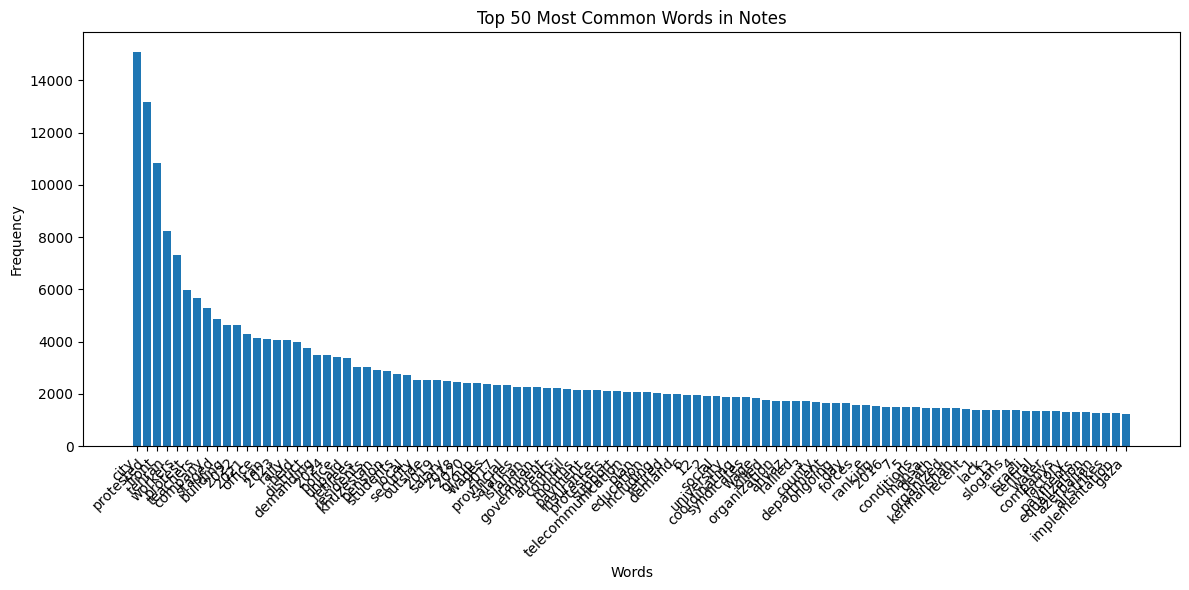

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import nltk
import re

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# Define a list of additional stopwords (e.g., months)
additional_stopwords = [
    'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 
    'september', 'october', 'november', 'december'
]

# Combine NLTK stopwords and additional stopwords
stop_words = set(stopwords.words('english')) | set(additional_stopwords)

# Function to clean and tokenize text
def clean_and_tokenize(text):
    if not isinstance(text, str):
        return []
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Split into words
    return [word for word in words if word not in stop_words]  # Remove stopwords

# Tokenize and clean all notes
all_words = data['notes'].dropna().apply(clean_and_tokenize).sum()

# Count the 50 most common words
word_counts = Counter(all_words).most_common(100)

# Convert to DataFrame for easier plotting
word_counts_df = pd.DataFrame(word_counts, columns=['word', 'count'])

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(word_counts_df['word'], word_counts_df['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Common Words in Notes')
plt.tight_layout()
plt.show()


In [112]:
escalation_words = ['Assault',
'Brutality',
'Clash',
'Combat',
'Conflict',
'Confrontation',
'Harassment',
'Hostility',
'Fighting',
'Brawl',
'Skirmish',
'Riot',
'Melee',
'Beating',
'Lynching',
'Torture',
'Killing',
'Murder',
'Stabbing',
'Shooting',
'Striking',
'Bombing',
'Gunfire',
'Explosion',
'Shelling',
'Airstrike',
'Drone strike',
'Missile',
'Gunfight',
'Incendiary',
'Artillery',
'Firebomb',
'Arson',
'Rebellion',
'Mutiny',
'Uprising',
'Insurrection',
'Coup',
'Revolution',
'Looting',
'Terror',
'Panic',
'Genocide',
'Ethnic cleansing',
'Slaughter',
'Carnage',
'Bloodshed',
'Annihilation',
'Atrocity',
'Execution',
'Decimation',
'Extermination',
'Tear gas',
'Rubber bullets',
'Batons',
'Barricade',
'Water cannon',
'Crowd control',
'Crackdown',
'Suppression',
'Force',
'Militia',
'Guerilla',
'Paramilitary',
'Insurgent',
'Terrorist',
'Extremist',
'Rebel',
'Mercenary',
'Combatant',
'Perpetrator',
'Destruction',
'Devastation',
'Casualties',
'Fatalities',
'Bloodbath',
'Scorched earth',
'Evacuation',
'Displacement',
'Chaos', 'violence', 'violent', 'beaten','attacked','attack', 'tear gas', 'massacre'
]

In [113]:

# Function to count the number of escalation words in a row
def count_escalation_words(text, escalation_words):
    if not isinstance(text, str):
        return 0
    # Create a case-insensitive search for each word
    return sum(text.lower().count(word.lower()) for word in escalation_words)

# Apply the function to the 'notes' column
data['escalation_count'] = data['notes'].apply(lambda x: count_escalation_words(x, escalation_words))

# Display the updated DataFrame
print(data[['notes', 'escalation_count']].head())

                                               notes  escalation_count
0  On 8 November 2024, militiamen of the Army of ...                 1
1  On 8 November 2024, supporters of 'Enjoining g...                 0
2  On 7 November 2024, health workers and nurses ...                 0
3  On 7 November 2024, health workers and nurses ...                 0
4  On 7 November 2024, health workers and nurses ...                 0


In [114]:
data

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,injury_count,the_count,escalation_count
0,IRN29327,2024-11-08,2024,1,Political violence,Battles,Armed clash,Army of Justice,NaN,Rebel group,...,2,Baloch Campaign; BBC News; Haalvash; Iran Inte...,Other-National,"On 8 November 2024, militiamen of the Army of ...",5,NaN,1731368108,0,4,1
1,IRN29484,2024-11-08,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),NaN,Protesters,...,1,Iran International,International,"On 8 November 2024, supporters of 'Enjoining g...",0,crowd size=no report,1731368109,0,2,0
2,IRN29337,2024-11-07,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Health Workers (Iran),Protesters,...,1,Human Rights Activists in Iran (HRA),Local partner-Other,"On 7 November 2024, health workers and nurses ...",0,crowd size=no report,1731368109,0,2,0
3,IRN29338,2024-11-07,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Health Workers (Iran),Protesters,...,1,Human Rights Activists in Iran (HRA),Local partner-Other,"On 7 November 2024, health workers and nurses ...",0,crowd size=no report,1731368109,0,2,0
4,IRN29339,2024-11-07,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Health Workers (Iran),Protesters,...,1,Human Rights Activists in Iran (HRA),Local partner-Other,"On 7 November 2024, health workers and nurses ...",0,crowd size=no report,1731368109,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28944,IRN15063,2016-01-02,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,1,Free Union of Iranian Workers,Other,"On 2 January 2016, some workers of Kayson Comp...",0,crowd size=no report,1646060629,0,3,0
28945,IRN15058,2016-01-02,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,1,Free Union of Iranian Workers,Other,"On 2 January 2016, about 500 workers of the Ea...",0,crowd size=about 500,1646060630,0,3,0
28946,IRN15057,2016-01-02,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,1,Free Union of Iranian Workers,Other,"On 2 January 2016, about 500 workers of the Ea...",0,crowd size=about 500,1646060632,0,3,0
28947,IRN15062,2016-01-01,2016,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Labor Group (Iran),Protesters,...,1,Free Union of Iranian Workers,Other,"On 1 January 2016, some workers of Kayson Comp...",0,crowd size=no report,1646060629,0,3,0


In [116]:
data.value_counts('escalation_count')

escalation_count
0     23701
1      2745
2      1107
3       761
4       355
5       140
6        79
7        33
8        16
9        10
10        2
Name: count, dtype: int64